# Workshop Linear Regression with Gradient Descent

In this workshop we will build a linear model from scratch and train it by optimising its parameters with the Gradient Descent algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

## Part 1 : Build a linear Model

### Step 1 : generate two random correlated vectors

In [2]:
np.random.seed(5)
feature = np.random.normal(5,1,40)
target  = np.random.normal(5,1,40)
feature.sort()
target.sort()
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.3 , random_state=0)

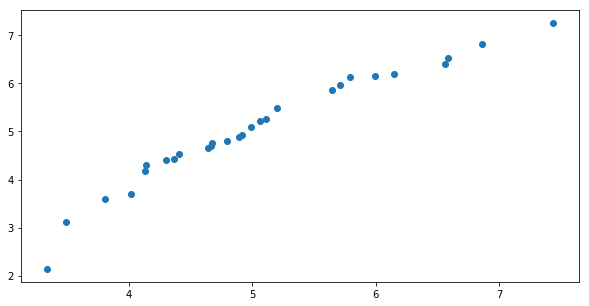

In [3]:
plt.figure(figsize=[10,5])
plt.scatter(X_train,y_train)
plt.show()

### Step 2 : Build a linear model  $$ \hat{Y} = \hat\beta_{0} + \sum \limits_{j=1}^{p} \hat\beta_{j}X_{j}$$

In [4]:
#choose random parameters :
a = 9
b = -4

#Linear Model :
y = a + b*X_train

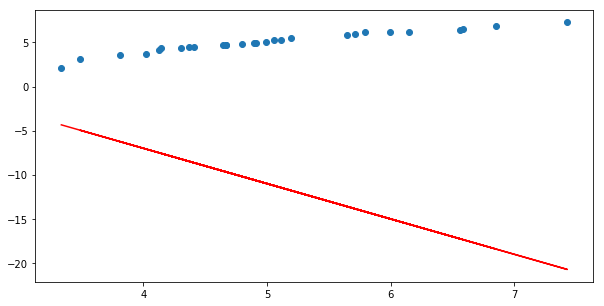

In [5]:
plt.figure(figsize=[10,5])
plt.scatter(X_train,y_train)
plt.plot(X_train,y,'red')
plt.show()

The training part consist of optimizing the loss of our model. In order to do this, we need first to implement a loss function then try to optimise it 

## Part 2 :
## Implement a loss function : SSE (Sum of Square Error)
$$ SSE = \sum \limits_{j=1}^{n}  (y-\hat{y})^{2} $$
$$ SSE = \sum \limits_{j=1}^{n}  [y-(\hat\beta_{0} + \sum \limits_{j=1}^{p} \hat\beta_{j}X_{j})]^{2} $$

### Step 1 : SSE Implementation

In [6]:
def SSE(a,b,x,y_true):
    y_pred = a + b*x
    sse = np.sum((y_pred-y_true)**2)
    return sse

In [7]:
SSE(a,b,X_train,y_train)

8182.613084164344

### Step 2 : Loss function (SSE) Visualization

In this part we will only focus on optimising the Intercept parameter and see how the value of our loss function changes when we move our intercept value from 8 to 35 with a step equal to 1 at each iteration.

In [8]:
interceptVect= []
for intercept in range(8,35,1):
    interceptVect.append(SSE(intercept,b,X_train,y_train))

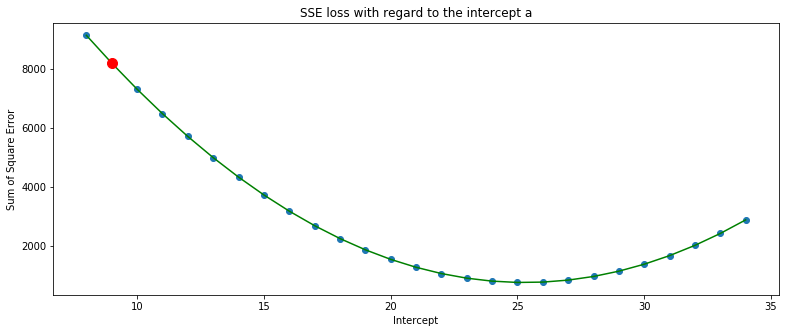

In [9]:
sse = SSE(a,b,X_train,y_train)
plt.figure(figsize=(13,5))
plt.scatter(np.arange(8,35,1),interceptVect)
plt.plot(np.arange(8,35,1),interceptVect,'green')
plt.xlabel('Intercept')
plt.ylabel('Sum of Square Error')
plt.title('SSE loss with regard to the intercept a')
plt.plot(a,sse,'ro',markersize=10)
plt.show()

## Part 3 : Liniar Model evaluation before any optimization

In [10]:
y_pred = a + b*X_test

In [11]:
result = pd.DataFrame({'test set':X_test,'ground truth':y_test,'predictions':y_pred})
result

,test set,ground truth,predictions
0,5.003289,5.124807,-11.013155
1,4.947692,5.012758,-10.790767
2,5.187603,5.355438,-11.750413
3,4.090768,3.835298,-7.363070
4,4.577492,4.564296,-9.309968
5,4.747908,4.759289,-9.991631
6,5.441227,5.656619,-12.764910
7,4.636689,4.572969,-9.546756
8,4.898932,4.899386,-10.595730
9,5.603472,5.789366,-13.413886


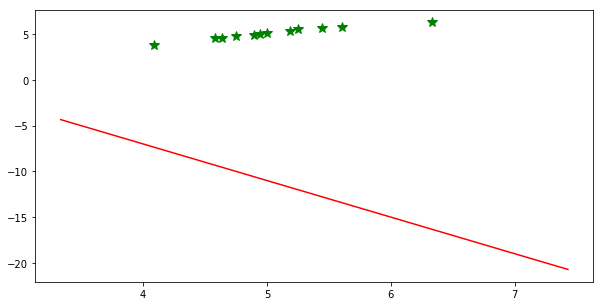

In [12]:
plt.figure(figsize=[10,5])
plt.plot(feature,(a + b*feature),'red')
plt.plot(X_test,y_test,'g*',markersize=10)
plt.show()

In [13]:
SSE(a,b,X_test,y_test)

3306.5743091708828

## Part 4 : Gradient Descent Implementation

In this case, we have one feature, so the loss function will be like :  <br>
$$ SSE = \sum \limits_{j=1}^{n}  [y-(a + bx)]^{2}, $$ $a$ is the intercept and $b$ is the slope of our linear model.<br>
In order to optimize this funciton, we need to calculate the partial derivatives.<br>

Intercept derivative ($a$) : <br>
$$ (y-(a + bx))^{2}\partial{a} = -2(y-a+bx)$$ <br>
$$ (y-(a + bx))^{2}\partial{a} = -2(y-\hat{y})$$
$$              SSE\partial{a} = \sum\limits_{j=1}^{n} -2(y-\hat{y})$$
Slope derivative ($b$) : <br>
$$ (y-(a + bx))^{2}\partial{b} = -2x(y-a+bx)$$
$$ (y-(a + bx))^{2}\partial{b} = -2x(y-\hat{y})$$
$$              SSE\partial{b} = \sum\limits_{j=1}^{n}-2x(y-\hat{y})$$

### Step 1 :
### Optimising the intercept parameter (a)

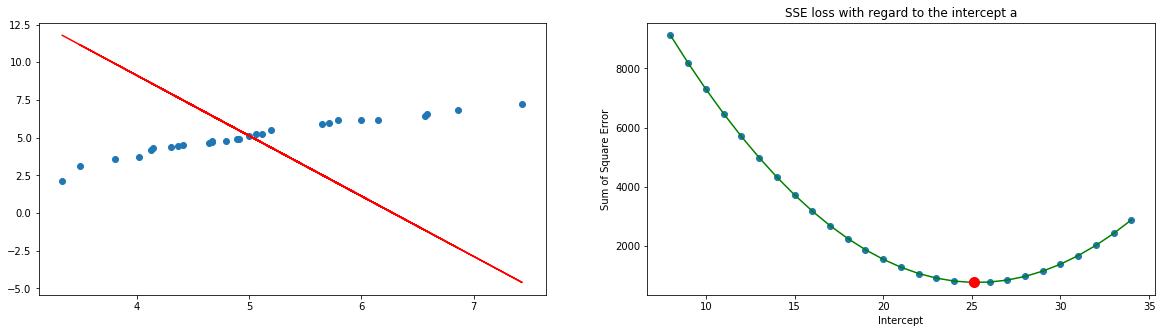

SSE :  748.9700765905911   epoch :  79  intercept :  25.122959410202895


In [14]:
epoch = 1000
learningRate = 0.001
gradientStop = 0.01

for i in range(epoch):
    #show the training process
    clear_output(wait=True)
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.scatter(X_train,y_train)
    plt.plot(X_train,(a + b*X_train),'red')
    plt.subplot(1,2,2)
    plt.scatter(np.arange(8,35,1),interceptVect)
    plt.plot(np.arange(8,35,1),interceptVect,'green')
    plt.plot(a,sse,'ro',markersize=10)
    plt.xlabel('Intercept')
    plt.ylabel('Sum of Square Error')
    plt.title('SSE loss with regard to the intercept a')

    plt.show()
    print('SSE : ',sse,'  epoch : ',i,' intercept : ',a)
    #-----------------------------------------------------
    #optimization algorithm 
    
    #calculate predictions
    y_pred = a+b*X_train
    
    #intercept derivative
    interceptDv = -2*np.sum(y_train-y_pred)
    
    #update intercept
    a      = a -learningRate*interceptDv
    
    #update loss
    sse = SSE(a,b,X_train,y_train)
    
    #break if the algorithm converge
    if(np.abs(learningRate*interceptDv)<gradientStop):
        break;

optimizing one parameter does not lead to an optimal solution, that's why we need to update all the model's parameters simultaneously when we apply any optimization algorithm.<br>
In this case, we have one feature, so we are going to update the weights : a and b (intercept and slope of our model).

<img src="https://i.stack.imgur.com/rX35X.png" >

### Step 2 : 
### Gradient Decent implementation : optimization of both intercept(a) and slope(b)

In [15]:
#reinitialize parameters :
a = 9
b = -4
sse = SSE(a,b,X_train,y_train)
sse

8182.613084164344

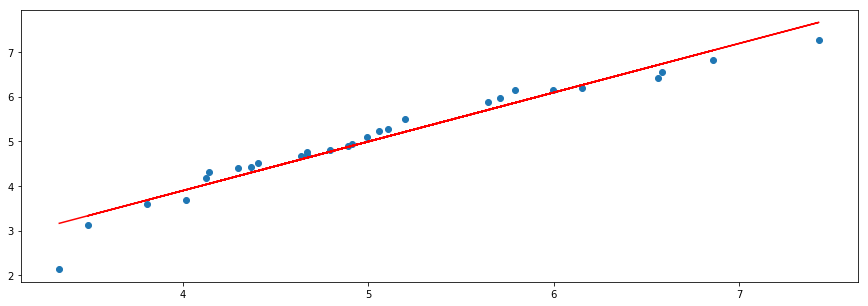

 SSE = 1.971243632432607    epoch :  0  intercept :  -0.5010429018884032  slope :  1.0982657602121004


In [22]:
epoch = 1000
learningRate = 0.001
gradientStop = 0.001

for i in range(epoch):
    #show figure
    clear_output(wait=True)
    plt.figure(figsize=[15,5])
    plt.scatter(X_train,y_train)
    plt.plot(X_train,(a + b*X_train),'red')
    plt.show()
    #-------------------------------------------------
    #optimization algorithm 

    #calculate predictions
    y_pred = a+b*X_train
    
    #weights derivatives
    interceptDv = -2*np.sum(y_train-y_pred)
    slopeDv = -2*np.sum(X_train*(y_train-y_pred))
    
    #weights update
    a      = a -learningRate*interceptDv
    b      = b -learningRate*slopeDv

    #loss update
    sse = SSE(a,b,X_train,y_train)
    
    #break if the algorithm converge
    print(' SSE =',sse,'   epoch : ',i,' intercept : ',a,' slope : ',b)
    if(np.abs(learningRate*interceptDv)<gradientStop) and (np.abs(learningRate*slopeDv)<gradientStop):
        break;

## Prediction :

In [17]:
y_pred = a + b*X_test

In [18]:
result = pd.DataFrame({'test set':X_test,'ground truth':y_test,'predictions':y_pred})
result

,test set,ground truth,predictions
0,5.003289,5.124807,5.054170
1,4.947692,5.012758,5.006423
2,5.187603,5.355438,5.212461
3,4.090768,3.835298,4.270487
4,4.577492,4.564296,4.688491
5,4.747908,4.759289,4.834846
6,5.441227,5.656619,5.430277
7,4.636689,4.572969,4.739331
8,4.898932,4.899386,4.964548
9,5.603472,5.789366,5.569614


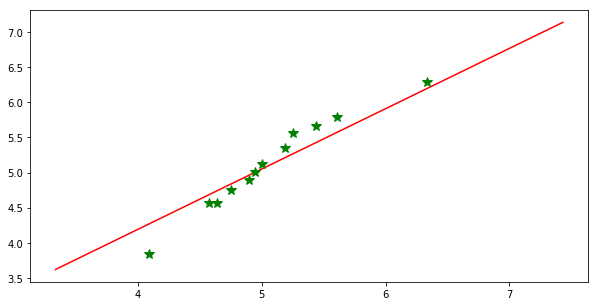

In [19]:
plt.figure(figsize=[10,5])
plt.plot(feature,(a + b*feature),'red')
plt.plot(X_test,y_test,'g*',markersize=10)
plt.show()

In [20]:
SSE(a,b,X_test,y_test)

0.4679816567882805

as we can see our predictions before applying any optimisation to our model were too bad due to underfitting and the SSE score for the test set was 8182. But after the model's optimisation with the gradient descent algorithm, our prediction became much better and the SSE score went down from 8182 to 0.53 on the test set wich is a huge progress.
<br>
That's it ;)

## Linear regression using Sklearn library :

In [21]:
from sklearn.linear_model import LinearRegression

#initialize liniear regression
linreg = LinearRegression()

#train the model
linreg.fit(X_train.reshape(-1,1),y_train)

#prediction
y_pred = linreg.predict(X_test.reshape(-1,1))

#evaluation
b = linreg.coef_[0]
a = linreg.intercept_
SSE(a,b,X_test,y_test)

0.24871654547663133